In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


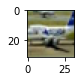

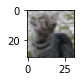

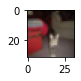

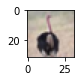

In [5]:
for i in range(332,336):
    plt.subplot(120+1+i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

In [6]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test=X_test/255
n_classes = 10

In [7]:
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)  
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [8]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3),
                 strides=(1,1), 
                 padding='same',
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(Conv2D(75, 
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

391/391 [==============================] - 190s 486ms/step - loss: 1.5885 - accuracy: 0.4168 - val_loss: 1.1838 - val_accuracy: 0.5885


In [9]:
classes = range(0,10)
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels = dict(zip(classes, names))
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)
predictions = model.predict(batch, verbose = 1)
print (predictions)

1/1 [==============================] - 0s 93ms/step
[[3.79642807e-02 6.98772492e-03 1.52352095e-01 1.44942015e-01
  2.78627157e-01 1.58512369e-01 5.58217838e-02 1.38658315e-01
  1.68854333e-02 9.24885739e-03]
 [3.00075617e-02 9.83315334e-03 7.76828527e-02 1.25833631e-01
  1.78647950e-01 1.78867146e-01 5.83947636e-02 3.08124959e-01
  1.54399155e-02 1.71680935e-02]
 [8.95681698e-03 7.90267438e-03 5.98006994e-02 1.37983710e-01
  6.95206150e-02 7.76509270e-02 5.82592249e-01 2.50732824e-02
  9.12344549e-03 2.13956684e-02]
 [2.07498614e-02 4.65649273e-03 8.52201283e-02 3.90583962e-01
  1.79367289e-01 1.13196015e-01 1.30092636e-01 6.20956644e-02
  5.43027418e-03 8.60777032e-03]
 [6.64727911e-02 5.36478102e-01 3.48613877e-03 3.75490519e-03
  4.52536205e-03 1.77867676e-03 1.30333100e-03 4.52452246e-03
  3.01859677e-02 3.47490221e-01]
 [5.17007746e-02 6.96161926e-01 3.09857493e-03 3.26945935e-03
  1.44598342e-03 1.07425172e-03 7.99459231e-04 6.10757212e-04
  9.36962664e-02 1.48142502e-01]
 [7.56

In [10]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0000001
1.0000001
1.0
0.99999994
1.0
1.0
0.99999994


In [14]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 7 6 3 1 1 2 6 8]


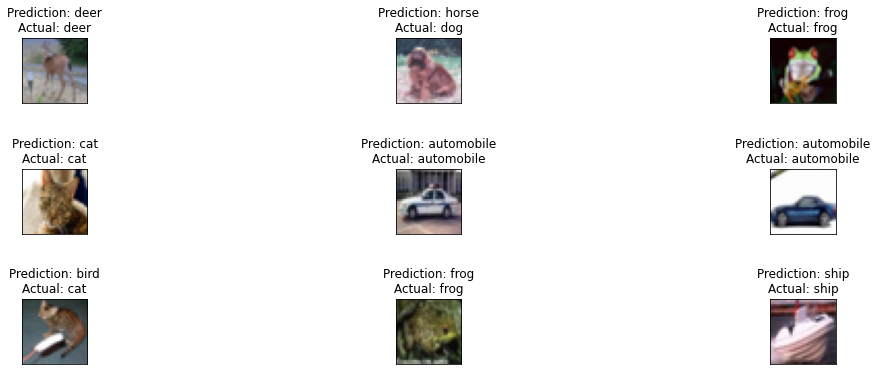

In [16]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
     for key, value in class_labels.items():
             if class_result[i] == key:
                    title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
                    axs[i].set_title(title)
                    axs[i].axes.get_xaxis().set_visible(False)
                    axs[i].axes.get_yaxis().set_visible(False)
                    axs[i].imshow(img)
plt.show()